In [26]:
import pandas as pd

# Load your data (you can adjust the path)
df = pd.read_csv('Data/human_trafficking.csv', low_memory=False)

# Iterate over each column and print unique values
for column in df.columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())
    print("-" * 50)  # Separator for clarity


Unique values for yearOfRegistration:
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019]
--------------------------------------------------
Unique values for Datasource:
['Case Management' 'Hotline']
--------------------------------------------------
Unique values for gender:
['Female' 'Male']
--------------------------------------------------
Unique values for ageBroad:
['18--20' '21--23' '24--26' '27--29' '30--38' '9--17' '-99' '0--8'
 '39--47' '48+']
--------------------------------------------------
Unique values for majorityStatus:
['Adult' 'Minor' '-99']
--------------------------------------------------
Unique values for majorityStatusAtExploit:
['-99' 'Minor' 'Adult']
--------------------------------------------------
Unique values for majorityEntry:
['-99' 'Minor' 'Adult']
--------------------------------------------------
Unique values for citizenship:
['CO' 'MD' 'RO' 'UA' 'BY' 'GH' 'AL' 'BG' 'UZ' 'ID' 'TJ' 'CD' 'ML' 'GW'
 'CI' 'SN' '

In [27]:
df.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   yearOfRegistration                      48801 non-null  int64 
 1   Datasource                              48801 non-null  object
 2   gender                                  48801 non-null  object
 3   ageBroad                                48801 non-null  object
 4   majorityStatus                          48801 non-null  object
 5   majorityStatusAtExploit                 48801 non-null  object
 6   majorityEntry                           48801 non-null  object
 7   citizenship                             48801 non-null  object
 8   meansOfControlDebtBondage               48801 non-null  int64 
 9   meansOfControlTakesEarnings             48801 non-null  int64 
 10  meansOfControlRestrictsFinancialAccess  48801 non-null  int64 
 11  me

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Loading the Data

# Target and Features
X = df.drop(columns=['typeOfExploitConcatenated'])
y = df['typeOfExploitConcatenated']

# Handle missing values by filling with the mode or using an appropriate strategy
X = X.fillna(X.mode().iloc[0])  # Example filling with the mode (for categorical features)

# Encoding categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoder to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Target encoding
y = le.fit_transform(y)

# One-hot encode target variable
y = to_categorical(y)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the numerical data (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network Model
model = Sequential()

# Input layer (no need for Input layer explicitly in Sequential model)
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))  # Dense layer with 512 units
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save('multi_class_model.h5')


C:\Users\hugok\AppData\Local\Temp\ipykernel_22260\2537145416.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(X.mode().iloc[0])  # Example filling with the mode (for categorical features)


Epoch 1/30


C:\Users\hugok\OneDrive\Dokumenty\GitHub\Hackathon\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9106 - loss: 0.3084 - val_accuracy: 0.9646 - val_loss: 0.1102
Epoch 2/30
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9630 - loss: 0.1207 - val_accuracy: 0.9702 - val_loss: 0.0923
Epoch 3/30
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9681 - loss: 0.0997 - val_accuracy: 0.9707 - val_loss: 0.0914
Epoch 4/30
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9708 - loss: 0.0957 - val_accuracy: 0.9693 - val_loss: 0.0884
Epoch 5/30
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9711 - loss: 0.0924 - val_accuracy: 0.9699 - val_loss: 0.0856
Epoch 6/30
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9713 - loss: 0.0924 - val_accuracy: 0.9703 - val_loss: 0.0835
Epoch 7/30
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9718 - loss: 0.0839 - val_accuracy: 0.9701 - val_loss: 0.0872
Epoch 8/30
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9721 - loss: 0.0864 - val_accurac

Test Loss: 0.07669125497341156, Test Accuracy: 0.974080502986908


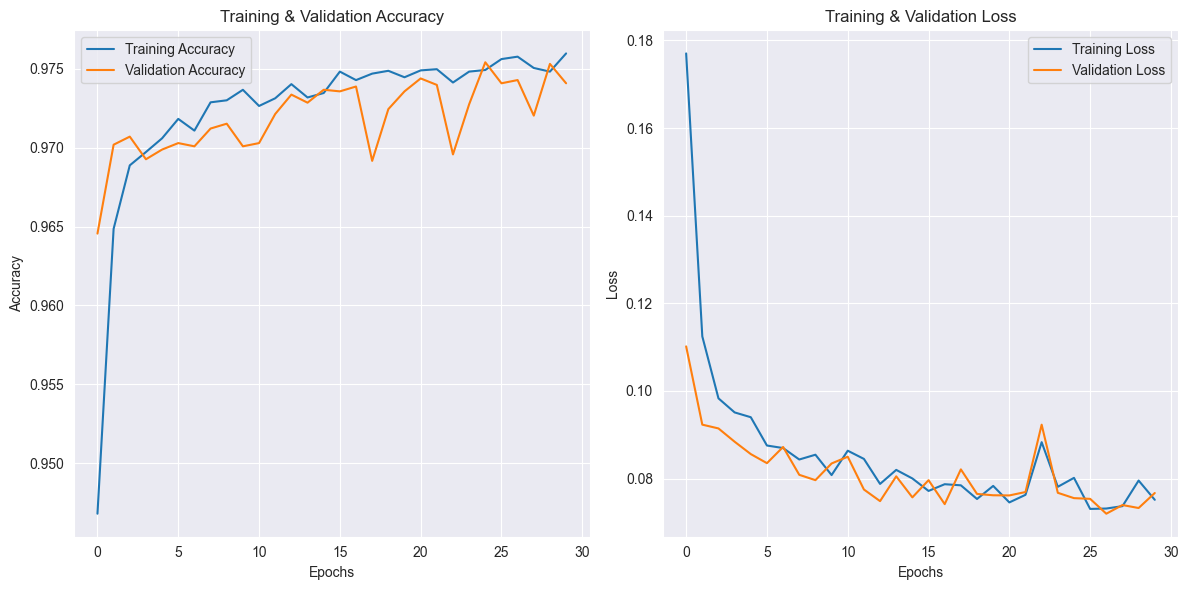

In [41]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping


model = Sequential()

# Input layer
model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # Normalize the inputs to each layer
model.add(LeakyReLU(alpha=0.01))  # LeakyReLU to avoid dead neurons
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(256))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with validation split and early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/50


C:\Users\hugok\OneDrive\Dokumenty\GitHub\Hackathon\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\hugok\OneDrive\Dokumenty\GitHub\Hackathon\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8070 - loss: 0.6434 - val_accuracy: 0.9622 - val_loss: 0.1163
Epoch 2/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9477 - loss: 0.1637 - val_accuracy: 0.9646 - val_loss: 0.1078
Epoch 3/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9545 - loss: 0.1362 - val_accuracy: 0.9663 - val_loss: 0.1023
Epoch 4/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9591 - loss: 0.1251 - val_accuracy: 0.9669 - val_loss: 0.0962
Epoch 5/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9606 - loss: 0.1163 - val_accuracy: 0.9676 - val_loss: 0.0938
Epoch 6/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9624 - loss: 0.1124 - val_accuracy: 0.9683 - val_loss: 0.0912
Epoch 7/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9640 - loss: 0.1089 - val_accuracy: 0.9699 - val_loss: 0.0892
Epoch 8/50
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9650 - loss: 0.1033 - val_accurac